In [1]:
# import numpy as np 
# import pandas as pd 

# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')
# train.head()

변수 중요도

In [2]:
# https://wyatt37.tistory.com/11

In [3]:
# age / embarked / fare 결측치 처리 

# train['Age'] = train['Age'].fillna(29.69)
# test['Age'] = test['Age'].fillna(29.69) 

# train['Embarked'] = train['Embarked'].fillna('S')

# test['Fare'] = test['Fare'].fillna(8.05)

In [4]:
# name > married

# train['Name'] = train['Name'].str.split(',').str[1]
# train['Name'] = train['Name'].str.split('.').str[0]

# test['Name'] = test['Name'].str.split(',').str[1]
# test['Name'] = test['Name'].str.split('.').str[0]

# my = [' Mr', ' Mrs']
# mn = [' Miss', ' Master', ' Rev', ' Mlle']

# train['Married'] = train['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)  
# test['Married'] = test['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)  

In [5]:
# 필요없는 변수 drop 

# train = train.drop(['Name', 'Cabin'], axis=1)
# test = test.drop(['Name', 'Cabin'], axis=1)

In [6]:
# 4 범주 이하 > 원핫
# 4 범주 이상 > 바이너리 (Why?)
# sex / embarked 원핫으로 만들기

# train = pd.get_dummies(train, columns=['Sex'])
# train = pd.get_dummies(train, columns=['Embarked'])
# train = pd.get_dummies(train, columns=['Pclass'])

Code

In [7]:
# https://www.kaggle.com/soham1024/titanic-data-science-eda-with-meme-solution

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [11]:
# feature_kind 

# survived / sex / embarked : categorical
# pclass                    : ordinal
# age / fare                : continuous 
# sibsp / parch             : discrete (수치적 의미,소수점 표현, 측정 all X)
# ticket / cabin            : mixed  

In [12]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
train.info()
print('-'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

숫자형 데이터 분포

In [14]:
# age / fare                : continuous 
# sibsp / parch             : discrete (수치적 의미,소수점 표현, 측정 all X)
# https://blog.naver.com/youji4ever/221804922659

In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# 38% 생존률을 갖는다. 

Text(0.5, 0, '')

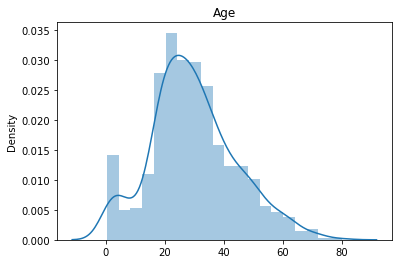

In [17]:
# Age

sns.distplot(train['Age'])
plt.title('Age')
plt.xlabel('')
# 왜도, 첨도 

Text(0.5, 0, '')

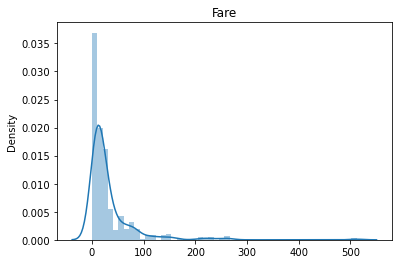

In [18]:
# fare

sns.distplot(train['Fare'])
plt.title('Fare')
plt.xlabel('')


Text(0.5, 0, '')

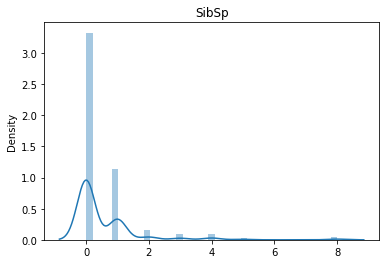

In [19]:
# sibsp

sns.distplot(train['SibSp'])
plt.title('SibSp')
plt.xlabel('')

Text(0.5, 0, '')

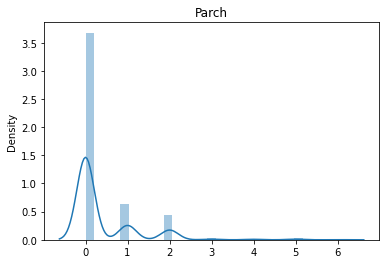

In [20]:
# parch

sns.distplot(train['Parch'])
plt.title('Parch')
plt.xlabel('')
# 대부분의 승객(>75%) 부모자녀와 동행하지 않았다.

- 

In [21]:
# fig, ax = plt.subplots(1,2, figsize=(10,5))

# sns.displot('SibSp', data = train,  ax= ax[0])
# sns.displot('Parch', data = train, ax=ax[1])
# plt.show()

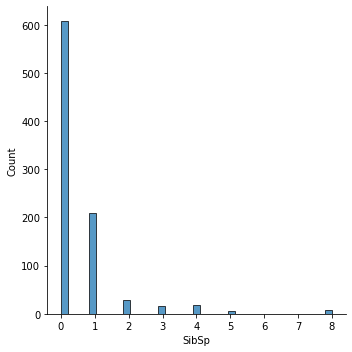

In [22]:
sns.displot(x = 'SibSp', data = train)

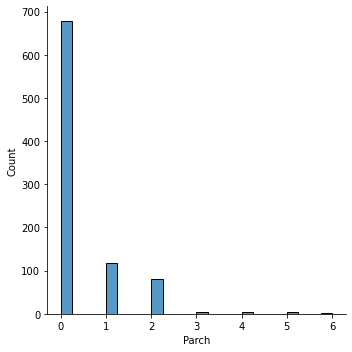

In [23]:
sns.displot(x ='Parch', data = train, binwidth=0.25)
# 대부분의 승객(>75%) 부모자녀와 동행하지 않았다. 

분류(범주)형 데이터 분포

- Sex       : 범주 2, 남성이 전체의 65%

- Ticket    : 중복값 O, 최대 7명이 같은 티켓 번호를 사용함 

- Cabin     : 중복값 O, 결측값이 77%. 승객 간 카빈 공유 가능성 

- Embarked  : 범주 3, 전체 승객의 72%가 S 항구에서 탑승함 

In [24]:
# Categorical 데이터 불러오기(dtypes = 'O'/'Object')
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mionoff, Mr. Stoytcho",male,347082,G6,S
freq,1,577,7,4,644


target과 상관관계 없는 변수 drop

In [25]:
# ticket 중복값이 많고 타겟과 상관관계가 may not(?) > 뭘 근거로? 
# cabin 결측값이 많고 불완전함
# name 비표준적이고 maybe(?) 타겟에 기여하지 않음 

In [26]:
# train =train.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)
# test =test.drop(['Ticket', 'Cabin', 'Name'], axis=1)

변수 생성

In [27]:
# family = sibsp + parch
# name > title
# age > age band
# fare range

In [28]:
# for dataset in combine:
#     dataset['Family'] = dataset['SibSp'] + dataset['Parch'] # 본인 포함인가요 아닌가요
    

앞선 분석 토대로 가정해보기

In [29]:
# 여성이 살 가능성이 높다.
# 아이들 (Age<?)이 살 가능성이 높다.
# 높은 클래스일수록 (1) 살 가능성이 높다.

피쳐 상관관계 분석

- pclass = 1 에서 (>0.5) 높은 상관관계 발견
- female 에서 높은 상관관계 발견
- sibsp 와 parch에서 상관관계가 0인 특정 값 존재함

In [30]:
# 빈 값이 없고
# 범주형(o), 순서형(c), 이산형(sibsp/parch)에 대해 합리적인 방법

In [31]:
# 동현 님 피드백
# 자동화
# pipeline에 한번에 집어넣고 전처리 실행하기

# fold out > train / validation / test 로 나누기 (일반화 할 때 유용하다는 건가? )

In [32]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [33]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [34]:
train[['SibSp','Survived']].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [35]:
train[['Parch','Survived']].groupby(['Parch'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


시각화 분석

In [36]:
# 데이터의 패턴을 식별하는 데 범주가 도움이 되는 연속형/ 수치형 데이터에 적합한 히스토그램
# 데이터의 분포를 나타냄

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Age', ylabel='Density'>

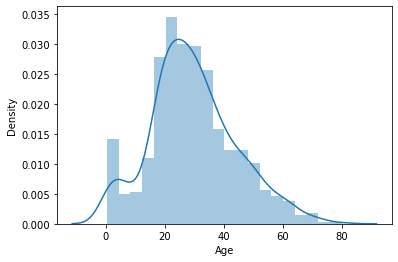

In [38]:
sns.distplot(train['Age'])

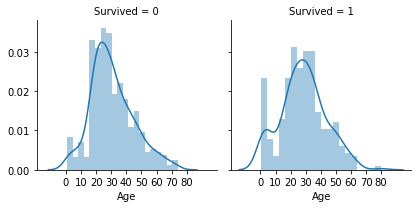

In [39]:
age = sns.FacetGrid(train, col='Survived')
age.map(sns.distplot, 'Age', bins=20)
plt.xticks(np.arange(0,90,10))
plt.show()

# 왜도 : 1 > 왜도가 양의 방향으로 큼.(나이가 어릴 수록 생존율이 높음)
# 첨도 : 0 > 평균을 중심으로 데이터가 모여있다. (2-30대의 사망률이 높음)

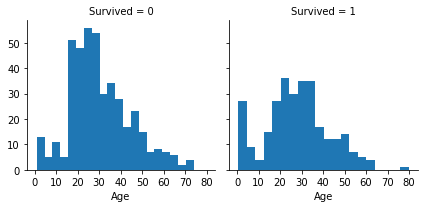

In [40]:
age = sns.FacetGrid(train, col='Survived')
age.map(plt.hist, 'Age', bins=20)
plt.xticks(np.arange(0,90,10))
plt.show()

In [41]:
# 0-5 생존률이 높다
# 2-30 사망률이 높다 
# 80대는 생존한다 (How?)
# 대부분 승객은 15-35세이다(how?) >>> age 고려. / 결측치 처리 

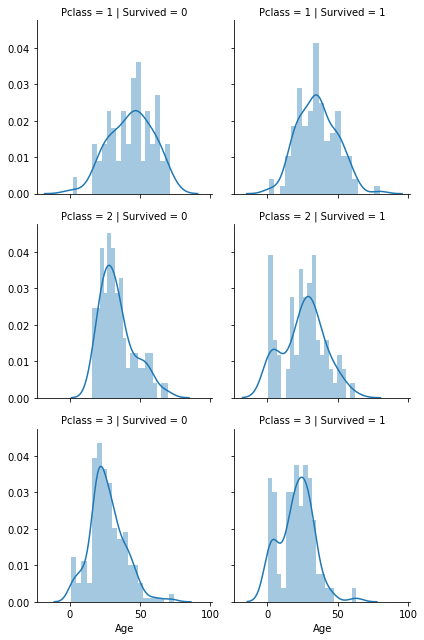

In [42]:
age = sns.FacetGrid(train, col='Survived', row='Pclass')
age.map(sns.distplot, 'Age', bins=20)
plt.show()

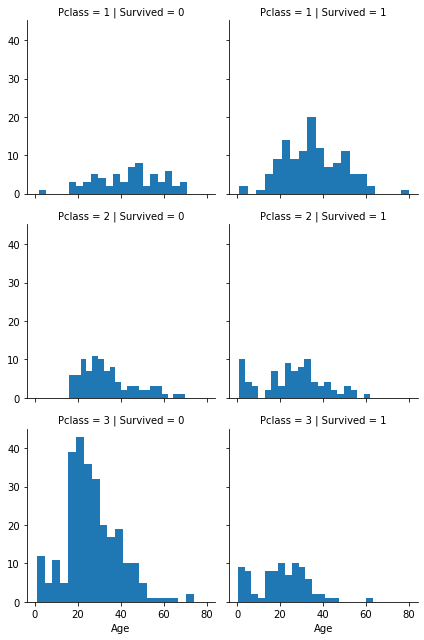

In [43]:
age = sns.FacetGrid(train, col='Survived', row='Pclass')
age.map(plt.hist, 'Age', bins=20)
plt.show()

In [44]:
# 3 class가 승객 대부분 (how?) / 대부분 죽는다.
# 2, 3 class 나이가 어린 승객(infant)은 대부분 산다. 
# 1 class 대부분이 산다.(how?) >>> class 고려. 

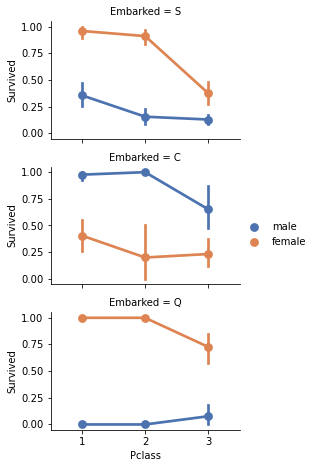

In [45]:
embark = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)     # 크기
embark.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')  # x, y, hue
embark.add_legend()

In [46]:
# 여성의 생존률이 남성보다 높다.
# C 항구만 예외적으로 남성의 생존률이 높은데, 탑승항구와 생존여부의 상관관계보다는, pclass와 탑승항구 / pclass와 survived 사이의 상관관계에 따른 것이지, 탑승항구와 생존여부 간의 직접적인 상관관계가 있다고 하긴 힘들다.
# 탑승항구는 pclass에 따라 남성의 생존율이 다양하다. 
# >>> sex 고려.
# >>> embarked 고려. / 결측치 처리 

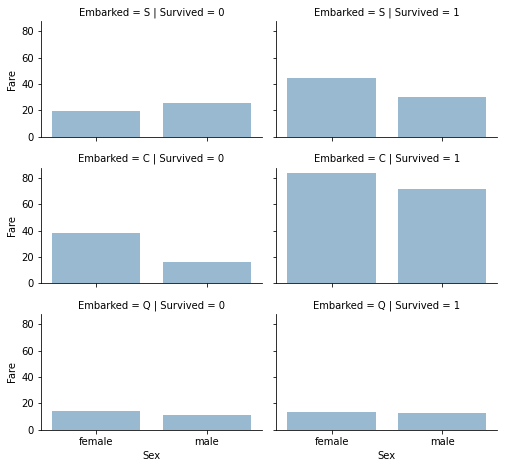

In [47]:
fare = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
fare.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)                             # ci = 신뢰구간(검은 선)
fare.add_legend()

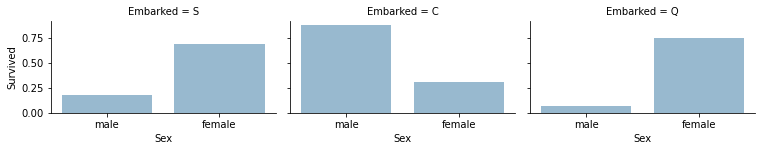

In [48]:
fare = sns.FacetGrid(train, col='Embarked', size=2.2, aspect=1.6)
fare.map(sns.barplot, 'Sex', 'Survived', alpha=.5, ci=None)                             # ci = 신뢰구간(검은 선)
fare.add_legend()

In [49]:
# 생존한 이들의 fare가 더 높다(성별 불문) : 탑승비용을 많이 낸 이들의 생존율이 높다.
# 생존남성 중 C항구 탑승이 생존율이 높다. 

Name > Title

In [50]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) # 정규표현식 

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [51]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [52]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


drop

In [53]:
print("Before", train.shape, test.shape, combine[0].shape, combine[1].shape)

train = train.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)
test = test.drop(['Ticket', 'Cabin', 'Name'], axis=1)
combine = [train, test]

"After", train.shape, test.shape, combine[0].shape, combine[1].shape

Before (891, 13) (418, 12) (891, 13) (418, 12)


('After', (891, 9), (418, 9), (891, 9), (418, 9))

문자열 > 숫자형

In [54]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


Age 결측치

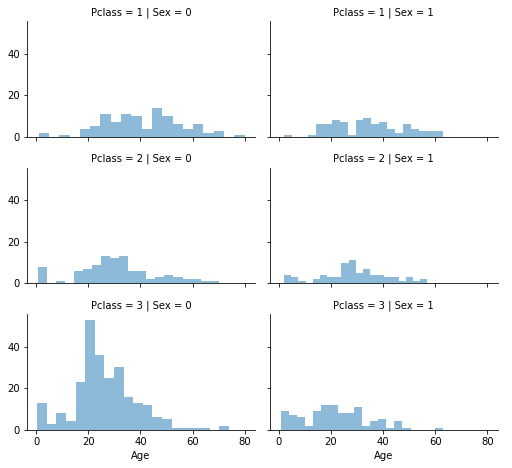

In [55]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [56]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [57]:
# 각 성별 클래스의 median 나이 넣기

In [58]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [59]:
# age 범주
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [60]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [61]:
train = train.drop(['AgeBand'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


Sibsp + parch > family size

In [62]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


family size > is alone

In [63]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


drop

In [64]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


pclass * age

In [65]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


embarked 결측치

In [66]:
freq_port = train.Embarked.dropna().mode()[0]
freq_port

'S'

In [67]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [68]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


fare 결측치

In [69]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)   # test에서 하면 안되는 거 아닌가? 
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [70]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [71]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]
    
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [72]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


모델 생성

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [73]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [76]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

In [77]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


In [80]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

# 노트북에서는 83% 인데.

78.23

In [82]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

In [83]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

In [85]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

In [89]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

In [99]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [100]:
from xgboost import XGBClassifier

In [101]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, Y_train)
acc_xgb = round(xgb.score(X_train, Y_train) * 100, 2)
acc_xgb

[12:11:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


86.53

In [102]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('xgb.csv', index=False)